In [61]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
labour = pd.read_excel(r"F:\project\labour1.xlsx")

In [63]:
labour.shape

(321, 23)

In [64]:
labour

Emp_ID     Name  Age  Gender  Nationality  Work Date    Site  \
0        2172    James   46    Male        Japan 2022-10-25  Site 2   
1        1346   Robert   36    Male        Japan 2022-10-25  Site 3   
2        2207     John   25    Male        China 2022-10-25  Site 1   
3        4950     Mary   39  Female     Malaysia 2022-10-25  Site 2   
4        2016  Michael   51    Male        China 2022-10-25  Site 2   
..        ...      ...  ...     ...          ...        ...     ...   
316  E1002360   Haebey   37    Male  Philippines 2022-10-25  Site 1   
317  E1002361  Haydnen   36    Male     Malaysia 2022-10-25  Site 2   
318  E1002362   Heater   36    Male        China 2022-10-25  Site 1   
319  E1002363     Heny   31    Male     Malaysia 2022-10-25  Site 2   
320  E1002364  Hezekih   21    Male  Philippines 2022-10-25  Site 2   

                      Rfid   Latitude  Longitude  ...  Noise_Detection  \
0    201303250000CD0000105  17.237036  78.576853  ...              Yes   
1    201303250000CD0000106  17.237130  78.576856  ...              Yes   
2    201303250000CD0000107  17.237191  78.576956  ...               No   
3    201303250000CD0000108  17.237225  78.576860  ...              Yes   
4    201303250000CD0000109  17.237282  78.576833  ...               No   
..                     ...        ...        ...  ...              ...   
316  201303250000CD0000390  17.236483  78.577594  ...               No   
317  201303250000CD0000392  17.236537  78.577524  ...              Yes   
318  201303250000CD0000394  17.236416  78.577610  ...              Yes   
319  201303250000CD0000398  17.236464  78.577399  ...              Yes   
320  201303250000CD0000399  17.236553  78.577310  ...               No   

     Infrared_Sensor Gas_Sensor Galvanic_Skin_Response_Sensor Temperature  \
0                 No         No                          6.84       33.55   
1                Yes         No                          6.59       33.55   
2                 No        Yes                          6.98       33.59   
3                Yes         No                          6.98       33.59   
4                Yes         No                          7.09       33.57   
..               ...        ...                           ...         ...   
316               No         No                         11.72       33.54   
317               No        Yes                         10.32       34.11   
318              Yes        Yes                         10.32       34.13   
319              Yes         No                         10.34       34.15   
320              Yes        Yes                         10.35       34.19   

       BVP    RR   HR   Work_Position  Over_time  
0   -18.39  15.6  123   Moving Bricks         No  
1   -45.77  15.6  122         Welding         No  
2    70.09  15.0  122   Moving Stones        Yes  
3   -48.23  15.0  121         Welding         No  
4     7.87  14.7  120  Cutting Bricks         No  
..     ...   ...  ...             ...        ...  
316  64.28  16.9  132          Re-Bar         No  
317  61.01  20.6  153          Re-Bar        Yes  
318  37.73  21.1  155          Re-Bar        Yes  
319  -6.29  21.1  157          Re-Bar         No  
320  37.31  20.9  158          Re-Bar        Yes  

[321 rows x 23 columns]

In [65]:
labour.isna().sum()
# No null values Present

Emp_ID                           0
Name                             0
Age                              0
Gender                           0
Nationality                      0
Work Date                        0
Site                             0
Rfid                             0
Latitude                         0
Longitude                        0
Working_Hours                    0
Experience                       0
Attendance                       0
Noise_Detection                  0
Infrared_Sensor                  0
Gas_Sensor                       0
Galvanic_Skin_Response_Sensor    0
Temperature                      0
BVP                              0
RR                               0
HR                               0
Work_Position                    0
Over_time                        0
dtype: int64

In [66]:
labour.duplicated()

# No Duplicate Values Present

0      False
1      False
2      False
3      False
4      False
       ...  
316    False
317    False
318    False
319    False
320    False
Length: 321, dtype: bool

In [67]:
#To view the categorical and numerical columns and its datatypes in the dataset                                    
labour.info()           # 10 numerical and 12 categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Emp_ID                         321 non-null    object        
 1   Name                           321 non-null    object        
 2   Age                            321 non-null    int64         
 3   Gender                         321 non-null    object        
 4   Nationality                    321 non-null    object        
 5   Work Date                      321 non-null    datetime64[ns]
 6   Site                           321 non-null    object        
 7   Rfid                           321 non-null    object        
 8   Latitude                       321 non-null    float64       
 9   Longitude                      321 non-null    float64       
 10  Working_Hours                  321 non-null    int64         
 11  Experience         

In [68]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
from sklearn.preprocessing import LabelEncoder, StandardScaler
enc = LabelEncoder()
for i in (3,4,6,12,13,14,15,21,22):
    labour.iloc[:,i] = enc.fit_transform(labour.iloc[:,i])
labour

Emp_ID     Name  Age  Gender  Nationality  Work Date  Site  \
0        2172    James   46       1            2 2022-10-25     1   
1        1346   Robert   36       1            2 2022-10-25     2   
2        2207     John   25       1            1 2022-10-25     0   
3        4950     Mary   39       0            3 2022-10-25     1   
4        2016  Michael   51       1            1 2022-10-25     1   
..        ...      ...  ...     ...          ...        ...   ...   
316  E1002360   Haebey   37       1            5 2022-10-25     0   
317  E1002361  Haydnen   36       1            3 2022-10-25     1   
318  E1002362   Heater   36       1            1 2022-10-25     0   
319  E1002363     Heny   31       1            3 2022-10-25     1   
320  E1002364  Hezekih   21       1            5 2022-10-25     1   

                      Rfid   Latitude  Longitude  ...  Noise_Detection  \
0    201303250000CD0000105  17.237036  78.576853  ...                1   
1    201303250000CD0000106  17.237130  78.576856  ...                1   
2    201303250000CD0000107  17.237191  78.576956  ...                0   
3    201303250000CD0000108  17.237225  78.576860  ...                1   
4    201303250000CD0000109  17.237282  78.576833  ...                0   
..                     ...        ...        ...  ...              ...   
316  201303250000CD0000390  17.236483  78.577594  ...                0   
317  201303250000CD0000392  17.236537  78.577524  ...                1   
318  201303250000CD0000394  17.236416  78.577610  ...                1   
319  201303250000CD0000398  17.236464  78.577399  ...                1   
320  201303250000CD0000399  17.236553  78.577310  ...                0   

     Infrared_Sensor  Gas_Sensor  Galvanic_Skin_Response_Sensor  Temperature  \
0                  0           0                           6.84        33.55   
1                  1           0                           6.59        33.55   
2                  0           1                           6.98        33.59   
3                  1           0                           6.98        33.59   
4                  1           0                           7.09        33.57   
..               ...         ...                            ...          ...   
316                0           0                          11.72        33.54   
317                0           1                          10.32        34.11   
318                1           1                          10.32        34.13   
319                1           0                          10.34        34.15   
320                1           1                          10.35        34.19   

       BVP    RR   HR  Work_Position  Over_time  
0   -18.39  15.6  123              9          0  
1   -45.77  15.6  122             13          0  
2    70.09  15.0  122             10          1  
3   -48.23  15.0  121             13          0  
4     7.87  14.7  120              3          0  
..     ...   ...  ...            ...        ...  
316  64.28  16.9  132             12          0  
317  61.01  20.6  153             12          1  
318  37.73  21.1  155             12          1  
319  -6.29  21.1  157             12          0  
320  37.31  20.9  158             12          1  

[321 rows x 23 columns]

In [69]:
# Data Cleaning
#Dropping the columns not necessary for analysis
labour=labour.drop(['Emp_ID','Name','Work Date','Rfid','Latitude','Longitude','Temperature','BVP'],axis=1)
labour

Age  Gender  Nationality  Site  Working_Hours  Experience  Attendance  \
0     46       1            2     1              1           2           1   
1     36       1            2     2              2           8           1   
2     25       1            1     0              1           4           0   
3     39       0            3     1              1           8           1   
4     51       1            1     1              1           9           0   
..   ...     ...          ...   ...            ...         ...         ...   
316   37       1            5     0              3           4           0   
317   36       1            3     1              3           5           1   
318   36       1            1     0              1           4           1   
319   31       1            3     1              3           2           1   
320   21       1            5     1              1           2           0   

     Noise_Detection  Infrared_Sensor  Gas_Sensor  \
0                  1                0           0   
1                  1                1           0   
2                  0                0           1   
3                  1                1           0   
4                  0                1           0   
..               ...              ...         ...   
316                0                0           0   
317                1                0           1   
318                1                1           1   
319                1                1           0   
320                0                1           1   

     Galvanic_Skin_Response_Sensor    RR   HR  Work_Position  Over_time  
0                             6.84  15.6  123              9          0  
1                             6.59  15.6  122             13          0  
2                             6.98  15.0  122             10          1  
3                             6.98  15.0  121             13          0  
4                             7.09  14.7  120              3          0  
..                             ...   ...  ...            ...        ...  
316                          11.72  16.9  132             12          0  
317                          10.32  20.6  153             12          1  
318                          10.32  21.1  155             12          1  
319                          10.34  21.1  157             12          0  
320                          10.35  20.9  158             12          1  

[321 rows x 15 columns]

In [70]:
labour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            321 non-null    int64  
 1   Gender                         321 non-null    int32  
 2   Nationality                    321 non-null    int32  
 3   Site                           321 non-null    int32  
 4   Working_Hours                  321 non-null    int64  
 5   Experience                     321 non-null    int64  
 6   Attendance                     321 non-null    int32  
 7   Noise_Detection                321 non-null    int32  
 8   Infrared_Sensor                321 non-null    int32  
 9   Gas_Sensor                     321 non-null    int32  
 10  Galvanic_Skin_Response_Sensor  321 non-null    float64
 11  RR                             321 non-null    float64
 12  HR                             321 non-null    int

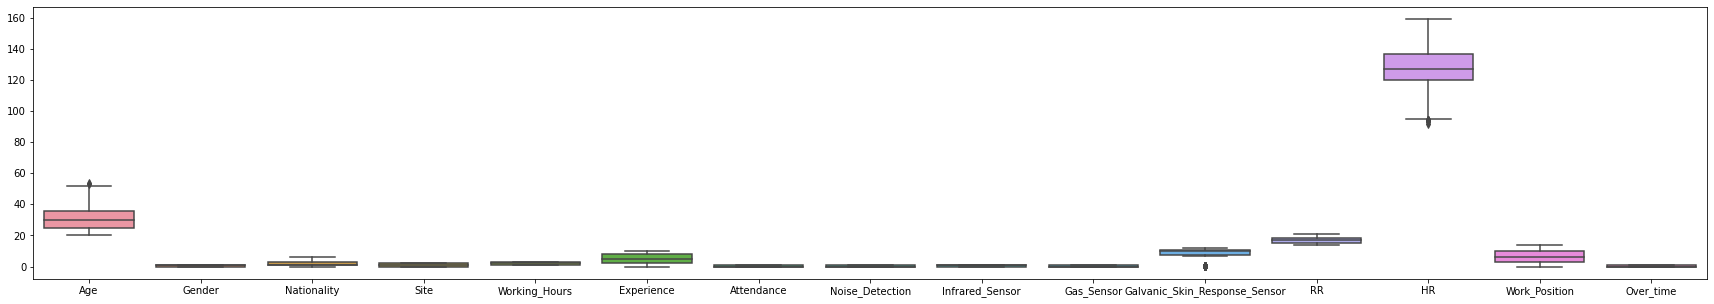

In [71]:
#boxplot - checking presence of outliers
fig=plt.figure(figsize=(30,5))
sns.boxplot(data= labour)
plt.show()

# Age and Experience has Outliers

<AxesSubplot:xlabel='Work_Position', ylabel='Count'>

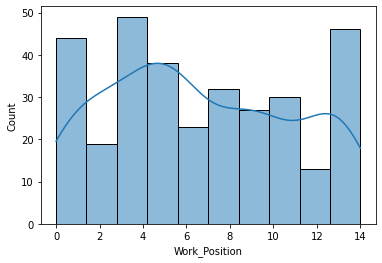

In [72]:
 sns.histplot(data=labour, x='Work_Position', kde=True)


<AxesSubplot:xlabel='Experience', ylabel='Count'>

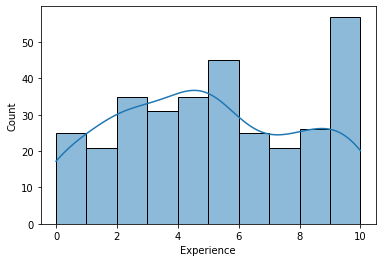

In [73]:
sns.histplot(data=labour, x='Experience', kde=True)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Nationality'}>,
        <AxesSubplot:title={'center':'Site'}>],
       [<AxesSubplot:title={'center':'Working_Hours'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Attendance'}>,
        <AxesSubplot:title={'center':'Noise_Detection'}>],
       [<AxesSubplot:title={'center':'Infrared_Sensor'}>,
        <AxesSubplot:title={'center':'Gas_Sensor'}>,
        <AxesSubplot:title={'center':'Galvanic_Skin_Response_Sensor'}>,
        <AxesSubplot:title={'center':'RR'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'Work_Position'}>,
        <AxesSubplot:title={'center':'Over_time'}>, <AxesSubplot:>]],
      dtype=object)

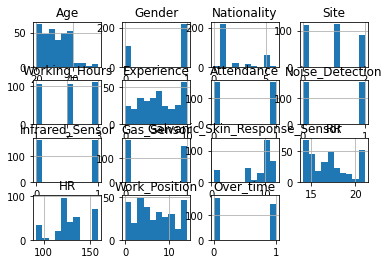

In [74]:
# histogram
labour.hist() # overall distribution of data

In [75]:
# calculating TWSS - Total within SS using different cluster range
from sklearn.cluster import KMeans

TWSS = []
k = list(range(2, 7))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(labour)
    TWSS.append(kmeans.inertia_)
    
TWSS

[67760.35012004284,
 36623.52683045043,
 27487.405765444502,
 21554.42994481535,
 19391.00286545568]

Text(0, 0.5, 'total_within_SS')

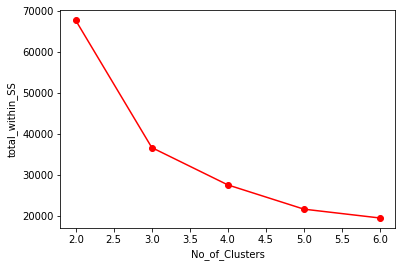

In [76]:
# Plotting the Scree plot using the TWSS from above defined function
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [77]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters, 
# as the curve is seemingly bent or showinf an elbow format at K = 4

model = KMeans(n_clusters = 4)
model.fit(labour)

KMeans(n_clusters=4)

In [78]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
labour['Performance'] = mb

In [79]:
labour.iloc[:, 1:].groupby(labour.Performance).mean()

Gender  Nationality      Site  Working_Hours  Experience  \
Performance                                                               
0            0.439024     2.032520  0.951220       1.943089    5.162602   
1            0.728571     1.957143  1.028571       2.000000    5.028571   
2            1.000000     2.044444  0.766667       2.100000    4.800000   
3            0.552632     1.605263  0.921053       2.078947    4.657895   

             Attendance  Noise_Detection  Infrared_Sensor  Gas_Sensor  \
Performance                                                             
0              0.504065         0.504065         0.398374    0.487805   
1              0.571429         0.571429         0.685714    0.542857   
2              0.477778         0.477778         0.500000    0.322222   
3              0.394737         0.394737         0.500000    0.552632   

             Galvanic_Skin_Response_Sensor         RR          HR  \
Performance                                                         
0                                 8.647154  14.852846  121.073171   
1                                10.372714  20.487143  155.500000   
2                                11.087000  16.646667  133.577778   
3                                 0.546842  18.171053   95.789474   

             Work_Position  Over_time  Performance  
Performance                                         
0                 6.243902   0.487805          0.0  
1                 7.085714   0.542857          1.0  
2                 6.911111   0.322222          2.0  
3                 6.157895   0.552632          3.0

cluster 0 = Good
cluster 1 = Poor
cluster 2 = Average

In [80]:
labour

Age  Gender  Nationality  Site  Working_Hours  Experience  Attendance  \
0     46       1            2     1              1           2           1   
1     36       1            2     2              2           8           1   
2     25       1            1     0              1           4           0   
3     39       0            3     1              1           8           1   
4     51       1            1     1              1           9           0   
..   ...     ...          ...   ...            ...         ...         ...   
316   37       1            5     0              3           4           0   
317   36       1            3     1              3           5           1   
318   36       1            1     0              1           4           1   
319   31       1            3     1              3           2           1   
320   21       1            5     1              1           2           0   

     Noise_Detection  Infrared_Sensor  Gas_Sensor  \
0                  1                0           0   
1                  1                1           0   
2                  0                0           1   
3                  1                1           0   
4                  0                1           0   
..               ...              ...         ...   
316                0                0           0   
317                1                0           1   
318                1                1           1   
319                1                1           0   
320                0                1           1   

     Galvanic_Skin_Response_Sensor    RR   HR  Work_Position  Over_time  \
0                             6.84  15.6  123              9          0   
1                             6.59  15.6  122             13          0   
2                             6.98  15.0  122             10          1   
3                             6.98  15.0  121             13          0   
4                             7.09  14.7  120              3          0   
..                             ...   ...  ...            ...        ...   
316                          11.72  16.9  132             12          0   
317                          10.32  20.6  153             12          1   
318                          10.32  21.1  155             12          1   
319                          10.34  21.1  157             12          0   
320                          10.35  20.9  158             12          1   

     Performance  
0              0  
1              0  
2              0  
3              0  
4              0  
..           ...  
316            2  
317            1  
318            1  
319            1  
320            1  

[321 rows x 16 columns]

In [81]:
#To check imbalance 
labour['Performance'].value_counts() 
#3 good, average, poor - 3 classes in taget feature

0    123
2     90
1     70
3     38
Name: Performance, dtype: int64

In [82]:
#Correlation 
corrMatrix = labour.corr()
corrMatrix

Age    Gender  Nationality      Site  \
Age                            1.000000  0.009283    -0.021244 -0.012169   
Gender                         0.009283  1.000000     0.031470 -0.059990   
Nationality                   -0.021244  0.031470     1.000000 -0.028621   
Site                          -0.012169 -0.059990    -0.028621  1.000000   
Working_Hours                  0.059574  0.118768    -0.053332 -0.036342   
Experience                     0.066533  0.008883    -0.037350 -0.038622   
Attendance                     0.060821  0.017749    -0.003880 -0.000343   
Noise_Detection                0.060821  0.017749    -0.003880 -0.000343   
Infrared_Sensor                0.009211  0.035373     0.019162  0.016069   
Gas_Sensor                     0.043710  0.005478     0.032998  0.062382   
Galvanic_Skin_Response_Sensor  0.041133  0.304456     0.117314 -0.034410   
RR                            -0.038876  0.155607    -0.022530  0.007007   
HR                             0.062607  0.248185     0.052090  0.011780   
Work_Position                 -0.036607  0.049707     0.088208  0.003669   
Over_time                      0.043710  0.005478     0.032998  0.062382   
Performance                   -0.218866  0.307974    -0.051754 -0.064103   

                               Working_Hours  Experience  Attendance  \
Age                                 0.059574    0.066533    0.060821   
Gender                              0.118768    0.008883    0.017749   
Nationality                        -0.053332   -0.037350   -0.003880   
Site                               -0.036342   -0.038622   -0.000343   
Working_Hours                       1.000000    0.081798    0.064782   
Experience                          0.081798    1.000000   -0.009276   
Attendance                          0.064782   -0.009276    1.000000   
Noise_Detection                     0.064782   -0.009276    1.000000   
Infrared_Sensor                    -0.041939    0.017496   -0.015567   
Gas_Sensor                         -0.002332   -0.020304    0.040379   
Galvanic_Skin_Response_Sensor       0.010579    0.037715    0.067877   
RR                                  0.052070   -0.008827    0.052782   
HR                                  0.008624    0.013485    0.096814   
Work_Position                       0.023536   -0.061753   -0.029205   
Over_time                          -0.002332   -0.020304    0.040379   
Performance                         0.076765   -0.060991   -0.061447   

                               Noise_Detection  Infrared_Sensor  Gas_Sensor  \
Age                                   0.060821         0.009211    0.043710   
Gender                                0.017749         0.035373    0.005478   
Nationality                          -0.003880         0.019162    0.032998   
Site                                 -0.000343         0.016069    0.062382   
Working_Hours                         0.064782        -0.041939   -0.002332   
Experience                           -0.009276         0.017496   -0.020304   
Attendance                            1.000000        -0.015567    0.040379   
Noise_Detection                       1.000000        -0.015567    0.040379   
Infrared_Sensor                      -0.015567         1.000000   -0.027880   
Gas_Sensor                            0.040379        -0.027880    1.000000   
Galvanic_Skin_Response_Sensor         0.067877         0.012260   -0.073332   
RR                                    0.052782         0.202182    0.060888   
HR                                    0.096814         0.154233   -0.021246   
Work_Position                        -0.029205         0.076649   -0.118147   
Over_time                             0.040379        -0.027880    1.000000   
Performance                          -0.061447         0.073226   -0.052137   

                               Galvanic_Skin_Response_Sensor        RR  \
Age                                                 0.041133 -0.038876   
Gender                    

In [83]:
labour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            321 non-null    int64  
 1   Gender                         321 non-null    int32  
 2   Nationality                    321 non-null    int32  
 3   Site                           321 non-null    int32  
 4   Working_Hours                  321 non-null    int64  
 5   Experience                     321 non-null    int64  
 6   Attendance                     321 non-null    int32  
 7   Noise_Detection                321 non-null    int32  
 8   Infrared_Sensor                321 non-null    int32  
 9   Gas_Sensor                     321 non-null    int32  
 10  Galvanic_Skin_Response_Sensor  321 non-null    float64
 11  RR                             321 non-null    float64
 12  HR                             321 non-null    int

Text(0.5, 1.0, 'Work_Position')

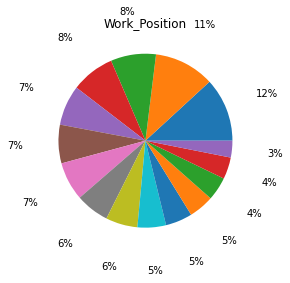

In [84]:
plt.pie(labour.Work_Position.value_counts(), autopct='%1.f%%', pctdistance=1.5)
plt.title('Work_Position')  # imbalanced dataset

In [85]:
labour.shape

(321, 16)

<AxesSubplot:>

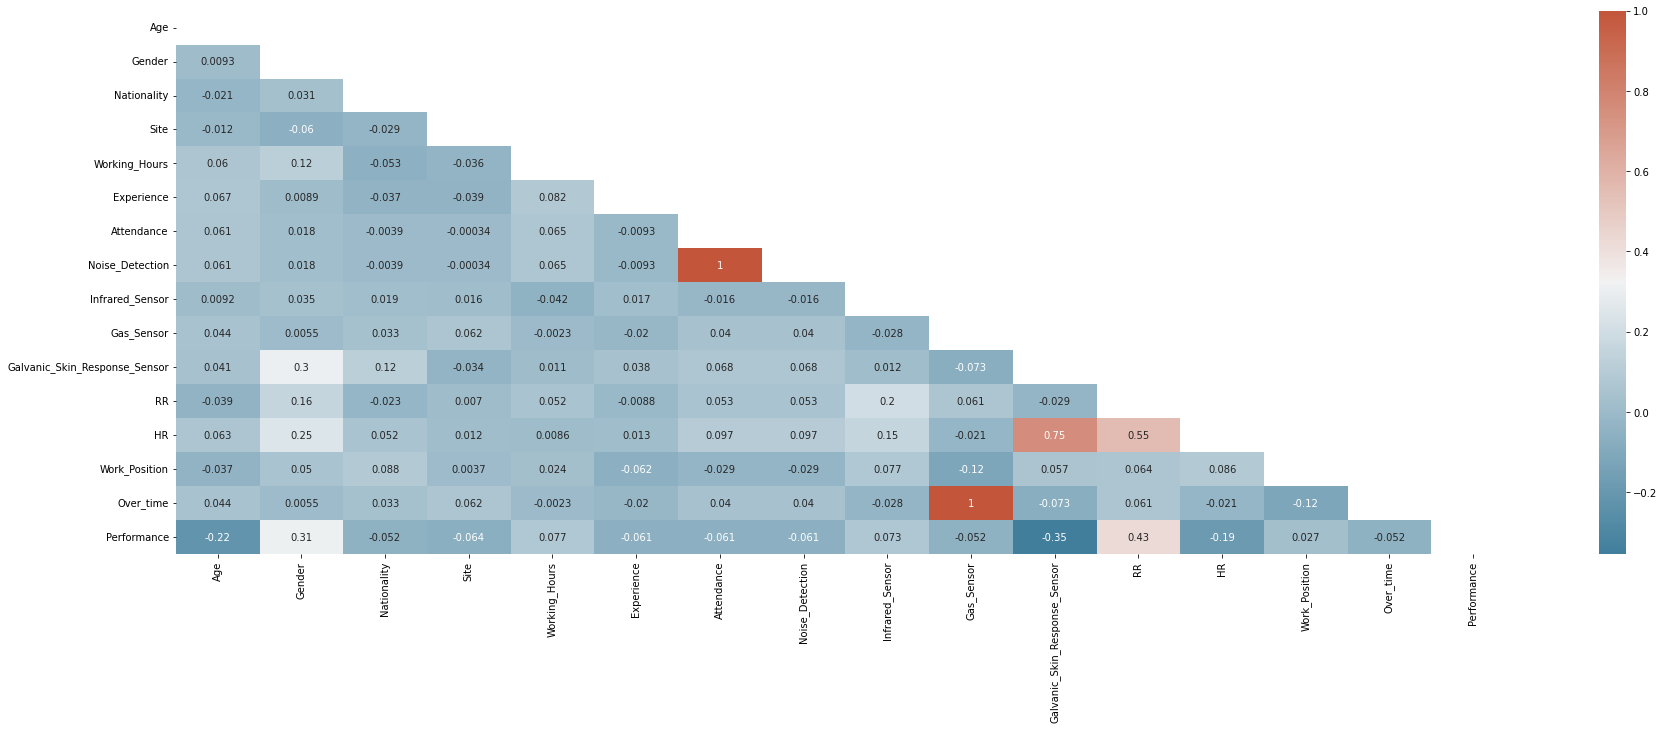

In [86]:
# Correlation between different variables
corr = labour.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(30, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
#Attendance and working hrs per day have strong correlation
#netconnectivity and workfromhome has strong correlation
#performance rating has positive and negative correlation with the features

In [87]:
X = labour.drop(["Performance"],axis=1)
X

Age  Gender  Nationality  Site  Working_Hours  Experience  Attendance  \
0     46       1            2     1              1           2           1   
1     36       1            2     2              2           8           1   
2     25       1            1     0              1           4           0   
3     39       0            3     1              1           8           1   
4     51       1            1     1              1           9           0   
..   ...     ...          ...   ...            ...         ...         ...   
316   37       1            5     0              3           4           0   
317   36       1            3     1              3           5           1   
318   36       1            1     0              1           4           1   
319   31       1            3     1              3           2           1   
320   21       1            5     1              1           2           0   

     Noise_Detection  Infrared_Sensor  Gas_Sensor  \
0                  1                0           0   
1                  1                1           0   
2                  0                0           1   
3                  1                1           0   
4                  0                1           0   
..               ...              ...         ...   
316                0                0           0   
317                1                0           1   
318                1                1           1   
319                1                1           0   
320                0                1           1   

     Galvanic_Skin_Response_Sensor    RR   HR  Work_Position  Over_time  
0                             6.84  15.6  123              9          0  
1                             6.59  15.6  122             13          0  
2                             6.98  15.0  122             10          1  
3                             6.98  15.0  121             13          0  
4                             7.09  14.7  120              3          0  
..                             ...   ...  ...            ...        ...  
316                          11.72  16.9  132             12          0  
317                          10.32  20.6  153             12          1  
318                          10.32  21.1  155             12          1  
319                          10.34  21.1  157             12          0  
320                          10.35  20.9  158             12          1  

[321 rows x 15 columns]

In [88]:
Y = labour["Performance"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
316    2
317    1
318    1
319    1
320    1
Name: Performance, Length: 321, dtype: int32

In [89]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [90]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 8, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 5, n_estimators = 150)
rand_clf.fit(X_train, Y_train)

Y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.9910714285714286
Test Accuracy of Random Forest Model is 0.9896907216494846


In [91]:
#Automatic EDA : Pandas profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(labour)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [92]:
import pickle

# open the pickle file in writebyte mode
file = open("model.pkl",'wb')
#dump information to that file
pickle.dump(rand_clf, file)
file.close()

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))